In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Read in cleaned data
clean_data = "./data/processed/US_SRG_merged_clean.pkl"
df_clean = pd.read_pickle(clean_data)

df_clean.head()

,Date,Rain_mm,AirTemp_C,SolarRad_kWm2,VPD_kPa,SoilTemp_10cm_C,SoilH2O_m3m3,Wind_speed_ms,RelHum_%,ET_mm_month
0,2020-01-01,0.803,10.648,0.155802,0.8084,16.187,14.511,1.865,36.957678,17.5768
1,2020-02-01,0.928,11.139,0.195431,0.9336,16.180,13.042,2.313,29.533900,43.3578
2,2020-03-01,0.877,13.300,0.221349,0.9693,16.185,10.743,2.191,36.539953,55.9308
3,2020-04-01,0.271,18.385,0.319464,1.7799,16.182,5.891,2.142,15.823503,42.8244
4,2020-05-01,0.451,24.416,0.328748,2.6492,16.194,3.809,1.932,13.403330,59.3344


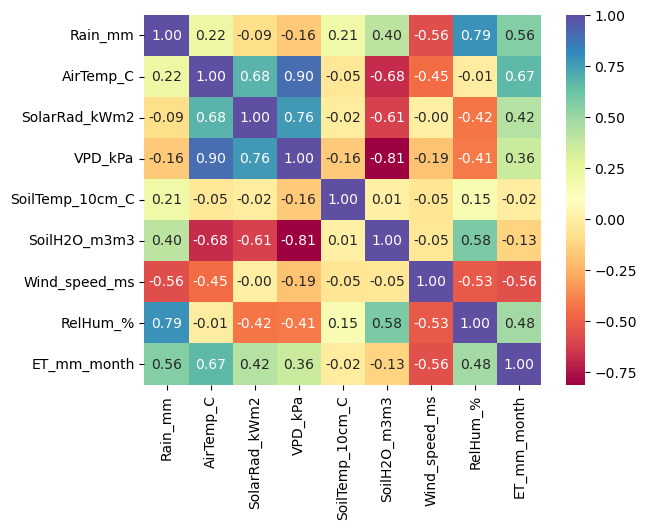

In [2]:
# Create matrix to identify strong correlations
corr_matrix = df_clean.drop("Date", axis=1).corr()

sns.heatmap(corr_matrix, annot=True, cmap="Spectral", fmt=".2f")

plt.show()

Strong Positive Correlations
- Air Temperature
- Rain
- Relative Humidity

Strong Negative Correlation
- Wind Speed

Text(0.5, 1.0, 'ET Relationship: Rain')

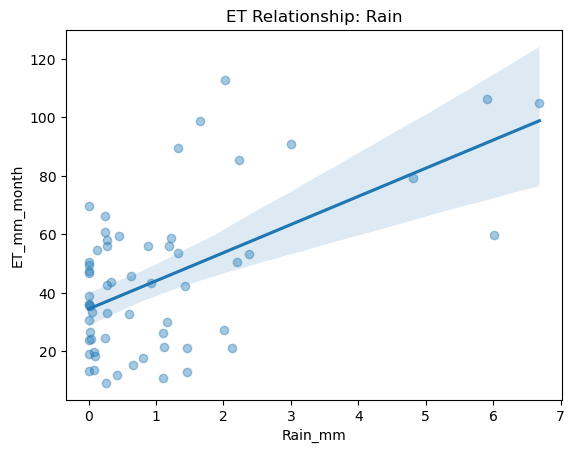

In [4]:
# Show ET vs Rain relationship
sns.regplot(data=df_clean, x="Rain_mm", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Rain")

The ET Relationship: Rain plot illustrates the positive correlationship between ET and rainfall.  

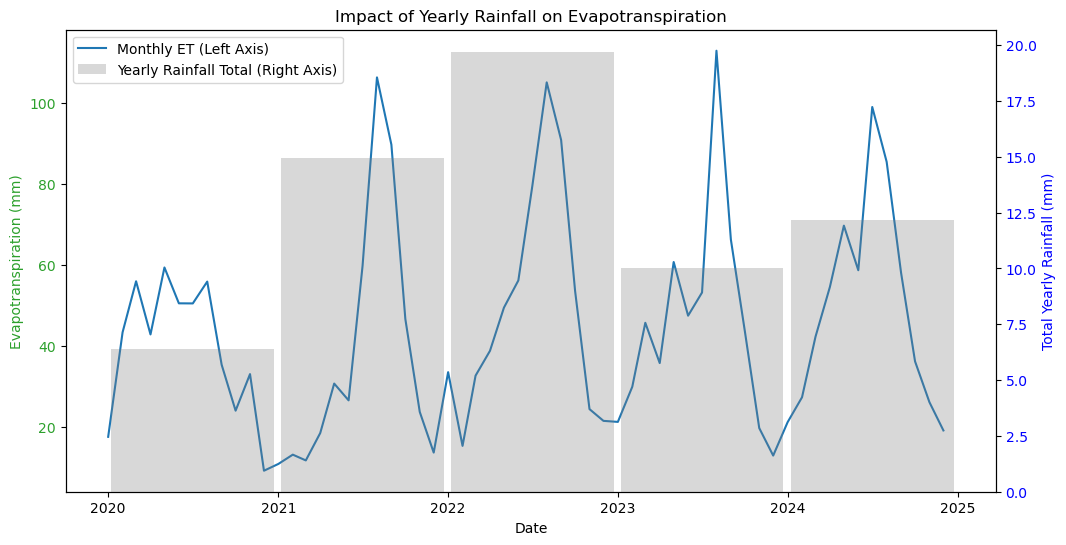

In [17]:
# Create ET and Rainfall plot over time

# Get yearly rain totals and rename new columns
yearly_rain = df_clean.groupby(df_clean["Date"].dt.year)["Rain_mm"].sum().reset_index()
yearly_rain.columns = ["Year", "Total_Rain"]

# Create column to anchor yearly rain bar to center of year
yearly_rain["Plot_Date"] = pd.to_datetime(yearly_rain["Year"].astype(str) + "-07-01")

# Set figure and yax1 size
fig, yax1 = plt.subplots(figsize=(12, 6))

# Create ET line plot and se left y axis
sns.lineplot(
    data=df_clean,
    x="Date",
    y="ET_mm_month",
    ax=yax1,
    color="tab:blue",
    label="Monthly ET (Left Axis)",
)
yax1.set_ylabel("Evapotranspiration (mm)", color="tab:green")
yax1.tick_params(axis="y", labelcolor="tab:green")

# Create total yearly rainfall right y axis
yax2 = yax1.twinx()
yax2.bar(
    yearly_rain["Plot_Date"],
    yearly_rain["Total_Rain"],
    color="grey",
    alpha=0.3,
    width=350,
    label="Yearly Rainfall Total (Right Axis)",
)
yax2.set_ylabel("Total Yearly Rainfall (mm)", color="blue")
yax2.tick_params(axis="y", labelcolor="blue")

# Create legend
lines_yax1, lbls_yax1 = yax1.get_legend_handles_labels()
lines_yax2, lbls_yax2 = yax2.get_legend_handles_labels()
yax1.legend(lines_yax1 + lines_yax2, lbls_yax1 + lbls_yax2, loc="upper left")

# Set title and show
plt.title("Impact of Yearly Rainfall on Evapotranspiration")
plt.show()

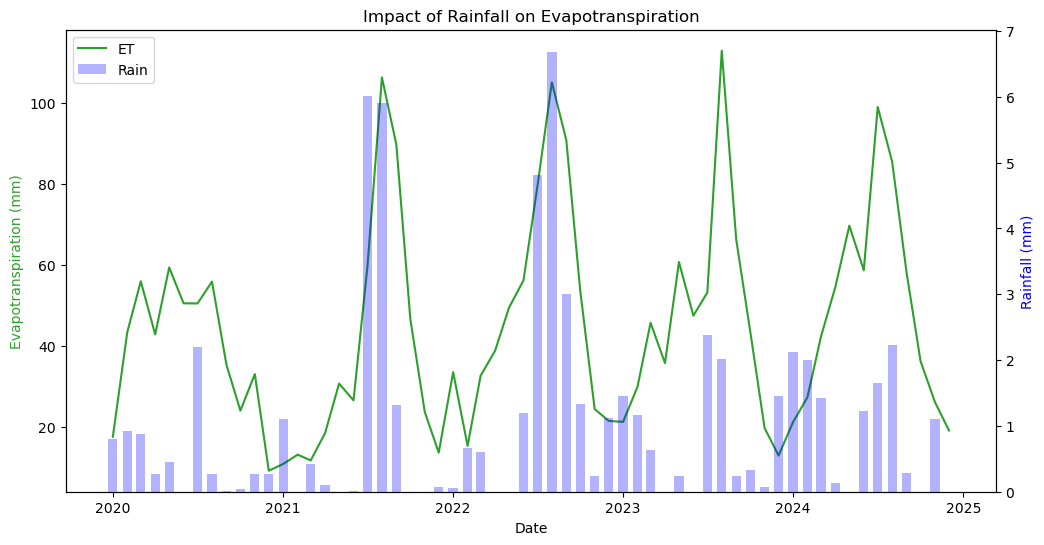

In [20]:
# Set figure and yax1 size
fig, yax1 = plt.subplots(figsize=(12, 6))

# Create ET line plot and se left y axis
sns.lineplot(data=df_clean, x="Date", y="ET_mm_month", ax=yax1, color="tab:green", label="ET")
yax1.set_ylabel("Evapotranspiration (mm)", color="tab:green")

# Create total yearly rainfall right y axis
yax2 = yax1.twinx()
yax2.bar(df_clean["Date"], df_clean["Rain_mm"], color="blue", alpha=0.3, label="Rain", width=20)
yax2.set_ylabel("Rainfall (mm)", color="blue")

# Create legend
lines_yax1, lbls_yax1 = yax1.get_legend_handles_labels()
lines_yax2, lbls_yax2 = yax2.get_legend_handles_labels()
yax1.legend(lines_yax1 + lines_yax2, lbls_yax1 + lbls_yax2, loc="upper left")

# Set title and show
plt.title("Impact of Rainfall on Evapotranspiration")
plt.show()

Impact of Yearly Rainfall on Evapotranspiration: We can see that higher yearly rainfall results in higher ET.  
For yearly rainfall under 10 mm, the max ET is around 60 mm (2020). This illustrates a water-limited system that inhibits ET under a certain rainfall amount.  
We can see the spike in rainfall (blue bars) immediately results in a spike in ET in 2021, proving the water limitation capped ET. Periods without rain result in immediate decline in ET, as well.  
We can also see that once the rainfall limitation is overcome, adding additional rain into the equation doesn't increase ET. 2022 doesn't have more ET just purely based on the additional rain received.  
This trend leads us to interpret the evaporation is driven by surface water availability, not soil moisture. To confirm, we can plot the relationship between ET and soil moisture.  
The plot also establishes a baseline of between 10 and 20mm of ET.

The ET Relationship: Rain plot illustrates the positive correlationship between ET and rainfall.  
Now we evaluate the next positive relationship, ET and air temperature.

Text(0.5, 1.0, 'ET Relationship: Soil Moisture')

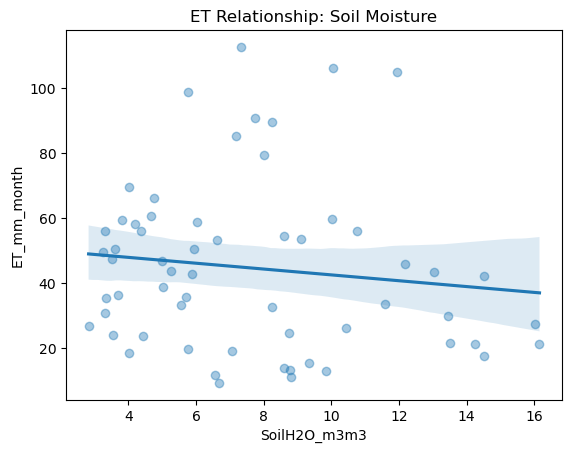

In [12]:
# Show ET vs Soil Moisture relationship
sns.regplot(data=df_clean, x="SoilH2O_m3m3", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Soil Moisture")

This plot confirms that soli moisture is not a driver of ET in this environment. It has high variance and provides no ability to predict ET. Instead, free surface water appears to be the driver.

Text(0.5, 1.0, 'ET Relationship: Air Temperature')

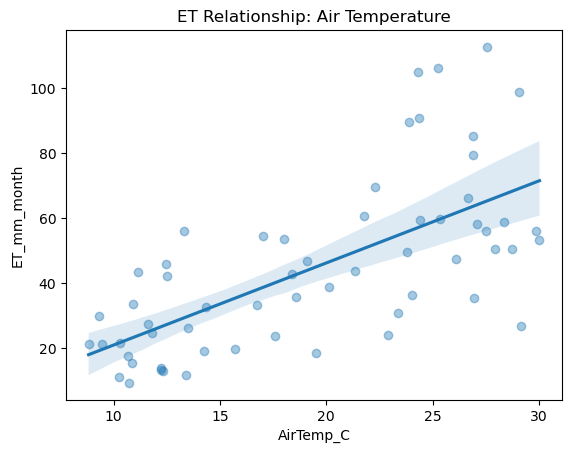

In [5]:
# Show ET vs Air Temperature relationship
sns.regplot(data=df_clean, x="AirTemp_C", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Air Temperature")

The ET Relationship: Rain plot illustrates the positive correlationship between ET and air temperature. Higher temperatures aid in ET, as it provides the energy required.  
Now, we need to visualize the relationship between ET and both positively correlated variables we've plotted, air temperature and rain.

Text(0.5, 1.0, 'ET Relationship: Air Temperature and Rain')

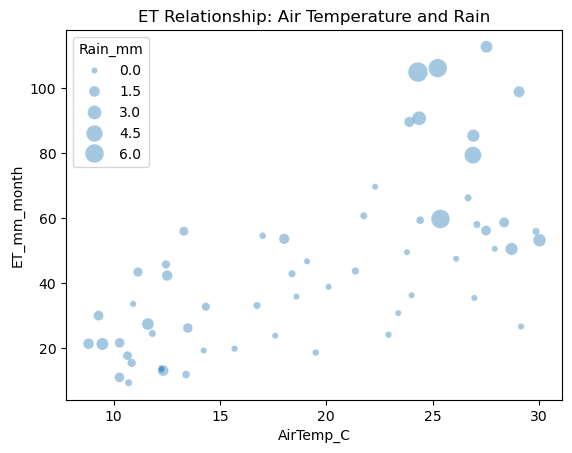

In [6]:
# Show ET vs Air Temperature and Rain Relationship
sns.scatterplot(
    data=df_clean, x="AirTemp_C", y="ET_mm_month", size="Rain_mm", sizes=(20, 200), alpha=0.4
)
plt.title("ET Relationship: Air Temperature and Rain")

This plot illustrates that the highest ET occurs when air temperature and rainfall are at their highest. Peak ET is constrained to periods with surface water availability and high energy (temperature).  
For periods with high temperatures and low rainfall, ET maxes out around 60 mm. This can also be said about periods with high rainfall and low temperatures.  
We can draw the conclusion that during wet periods, the limiting factor becomes the temperature. Energy is needed to drive ET.

Now, we will evaluate our strong negative correlation, wind speed.  
To start we will plot the relationship.

Text(0.5, 1.0, 'ET Relationship: Wind Speed')

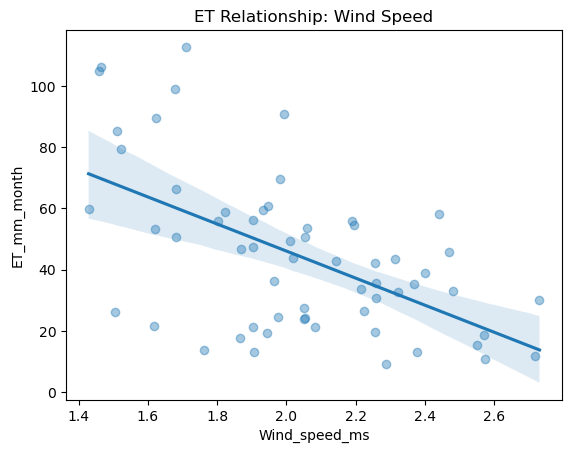

In [7]:
# Show ET vs Wind Speed relationship
sns.regplot(data=df_clean, x="Wind_speed_ms", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Wind Speed")

You can see in this plot that ET decreases as wind speed increases, though the max wind speed is only a light breeze at 2.7 m/s.  
This goes against usual behavior, as wind tends to increase evaporation (based on standard Penman-Monteith models).  
Considering this and that the wind isn't strong enough to suppress the ET, this leads us to hypothesize that wind is a signal of another weather pattern.  
To evaluate further, we will look at wind speeds across rainy and dry periods.

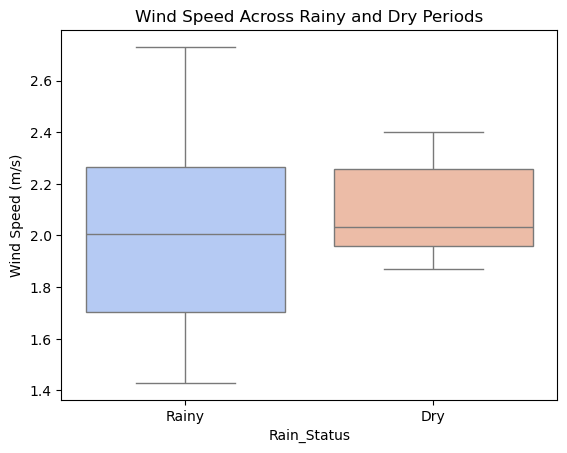

In [8]:
# Create new rain_status category column
df_clean["Rain_Status"] = df_clean["Rain_mm"].apply(lambda x: "Rainy" if x > 0 else "Dry")

# Display new category on boxplot and show relationship to wind speed
sns.boxplot(
    data=df_clean, x="Rain_Status", y="Wind_speed_ms", hue="Rain_Status", palette="coolwarm"
)
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Across Rainy and Dry Periods")
plt.show()

This box plot shows that average wind speeds are similar in both rainy and dry conditions, but wind speeds below about 1.9 m/s are unique to rainy conditions.  
This lets us infer that the negative correlation between ET and wind are a result of these rainy periods with low rain.  
To confirm, we will look at additional plots.

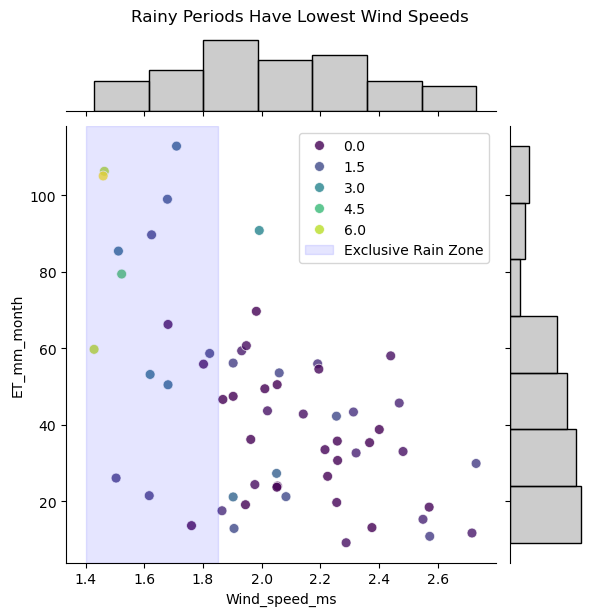

In [9]:
# Create plot to show relationship between wind speed and rain with exclusive rain zone
grid = sns.JointGrid(data=df_clean, x="Wind_speed_ms", y="ET_mm_month")
grid.plot_joint(sns.scatterplot, hue=df_clean["Rain_mm"], palette="viridis", s=50, alpha=0.8)
grid.ax_joint.axvspan(1.4, 1.85, color="blue", alpha=0.1, label="Exclusive Rain Zone")

# Create histograms for top and right
grid.plot_marginals(sns.histplot, kde=False, color="grey", alpha=0.4)

grid.ax_joint.legend()
grid.fig.suptitle("Rainy Periods Have Lowest Wind Speeds", y=1.02)
plt.show()

This plot highlights the exlusive rain zone that we discovered in the previous plot.  
With this, we can confirm our hypothesis that periods with the most rain have the lowest wind speeds.  
Now, let's tie our main correlations together. We will create a plot with air temperature, rain, and wind speed.

<Axes: xlabel='Wind_speed_ms', ylabel='ET_mm_month'>

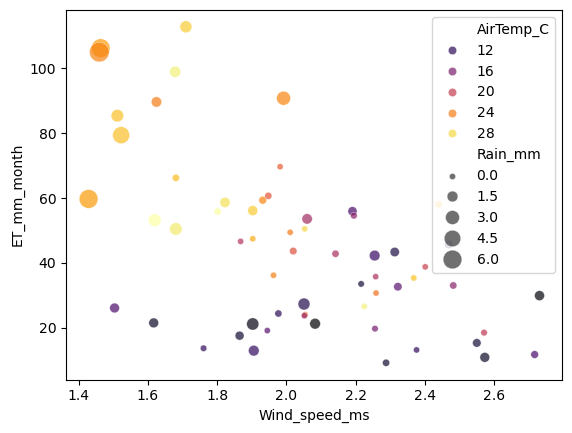

In [13]:
# Show ET vs Wind Speed relationship using Air Temp colors and Wind Speed size
sns.scatterplot(
    data=df_clean,
    x="Wind_speed_ms",
    y="ET_mm_month",
    hue="AirTemp_C",
    palette="inferno",
    size="Rain_mm",
    sizes=(20, 200),
    alpha=0.7,
)

This plot allows us to see the perfect combination of variables that result in peak ET.  
The top left of the plot show the conditions that drive the highest ET - low wind, high temperatures (energy), and high rainfall.  
In the bottom right, we see the conditions that inhibit high ET.  
The presence of any one of the factors - high wind (which we know means decreased rainfall), low temperature, or lack of rainfall - results in lower levels of ET.  
Peak ET is driven by high temperatures (energy), high rainfaill (water availability), and low wind.  
We will conclude with a pairplot displaying the relationship between these important factors.

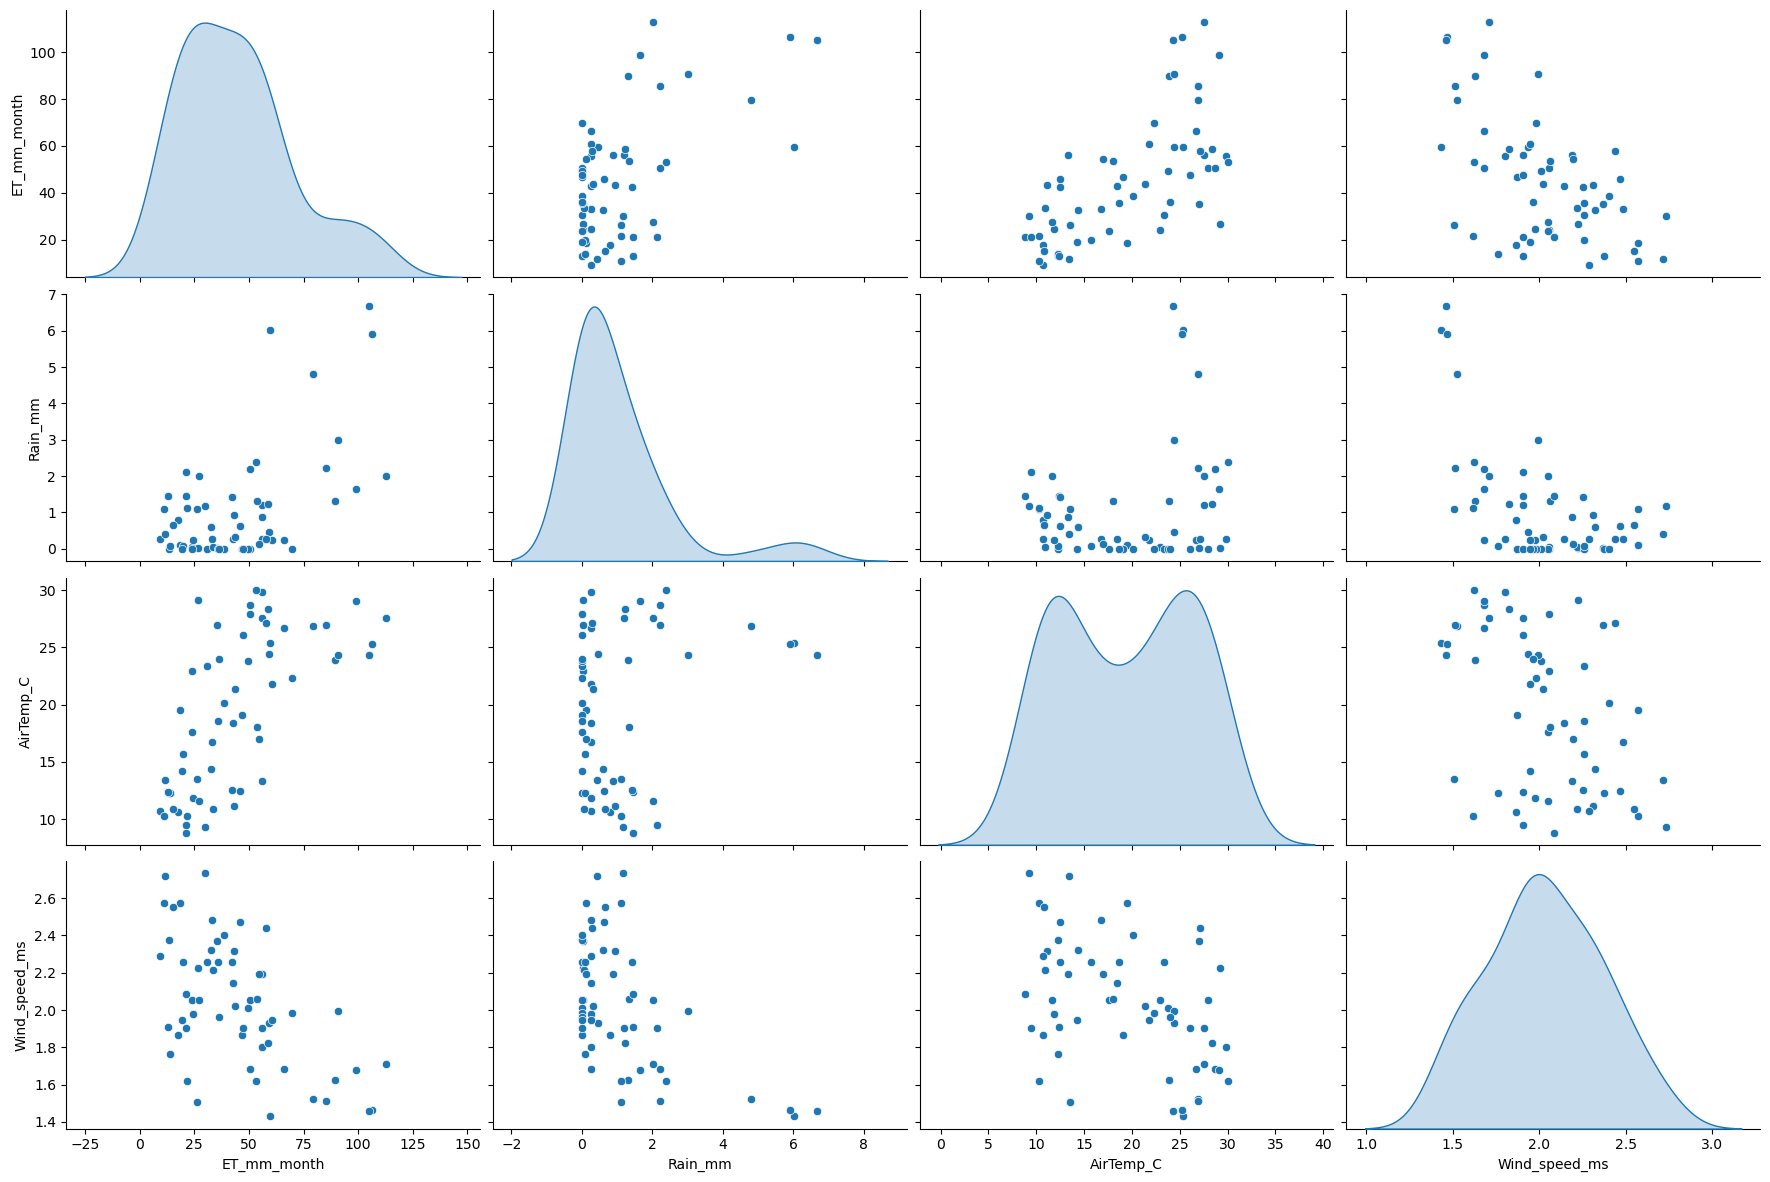

In [22]:
# Create ET pairplot with important variable correlations
et_vars = ["ET_mm_month", "Rain_mm", "AirTemp_C", "Wind_speed_ms"]

sns.pairplot(df_clean[et_vars], diag_kind="kde", height=3, aspect=1.5)
plt.show()